# Import necessary libraries

In [1]:
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K

### MNIST Dataset import

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

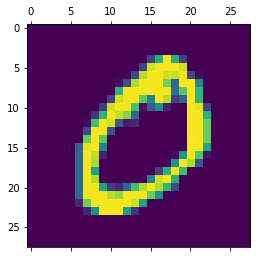

In [4]:
plt.matshow(X_train[1])

# Custom Activation Function

The Activation Function can be modified based on two things:

i) Its classification type
ii) No. of Negative values present in dataset
iii) Its differentiabilty around 0.

And using these conditions I have created a modified activation function which works as a leaky ReLU first and then utilise that updated values in an ELU function.

Thus the issue of negative value of ReLU is resolved by ELU and then it is wrapped upon Leaky ReLU which fix the “dying ReLU” problem by having a small negative slope (of 0.01,0.05 or so).

In [5]:
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [6]:
def multi_af(x):
    return K.maximum(0.05*x,x) # A modified version of RelU which performs good for negative as well as 0-1 values.
# If classification is binary then bin_af function else multi_af function is called
def bin_af(x):
    return 1 / (1 + math.exp(-x))
dropout=0.3

### We can also apply a condition that if number of values less than 0 are more than 50% , then do not go for ReLu, else you can perform ReLu to reduce computation time.

## Model Architecture

In [7]:
if num_labels>2:
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Lambda(multi_af),
    tf.keras.layers.Dropout(dropout, input_shape=(2,)),
    tf.keras.layers.ELU(alpha=1.0),
    tf.keras.layers.Dense(num_labels, activation='softmax')
])
else:
     model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(256),
     tf.keras.layers.Lambda(multi_af),
     tf.keras.layers.Dropout(dropout, input_shape=(2,)),
     tf.keras.layers.ELU(alpha=1.0),
     tf.keras.layers.Dense(num_labels, activation='sigmoid')
])
    


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 lambda (Lambda)             (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 elu (ELU)                   (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trai

### Model Complilation can be changed based on no. of categories

In [9]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train,validation_split=0.1 ,epochs=10,batch_size=128)

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.3471 - accuracy: 0.9000 - val_loss: 0.1466 - val_accuracy: 0.9605
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1719 - accuracy: 0.9497 - val_loss: 0.1056 - val_accuracy: 0.9695
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1289 - accuracy: 0.9614 - val_loss: 0.0938 - val_accuracy: 0.9725
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1062 - accuracy: 0.9679 - val_loss: 0.0777 - val_accuracy: 0.9767
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0919 - accuracy: 0.9725 - val_loss: 0.0813 - val_accuracy: 0.9787
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0803 - accuracy: 0.9762 - val_loss: 0.0714 - val_accuracy: 0.9792
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.0736 - accuracy: 0.9774 - val_loss: 0.0736 - val_accuracy: 0.9802
Epoch 

### Train and Test Accuracy

In [10]:
tf1=model.evaluate(X_train, y_train)
tf2=model.evaluate(X_test, y_test)
print("Train Accuracy is ",tf1[1])
print("Test Accuracy is ",tf2[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0800 - accuracy: 0.9774
Train Accuracy is  0.989466667175293
Test Accuracy is  0.977400004863739


### Train and Test Loss

In [11]:
print("Train Loss is ",tf1[0])
print("Test Loss is ",tf2[0])

Train Loss is  0.03608488291501999
Test Loss is  0.07999162375926971


In [12]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 0s 1ms/step


### Confusion Matrix

Text(69.0, 0.5, 'Truth')

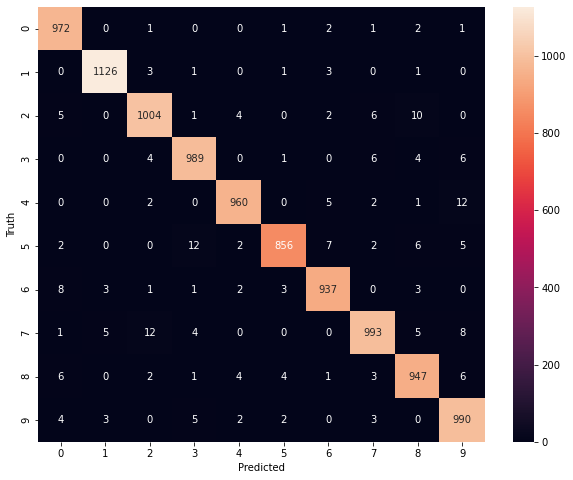

In [13]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## F1 Score

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predicted_labels, average='weighted')


0.9773929890789746

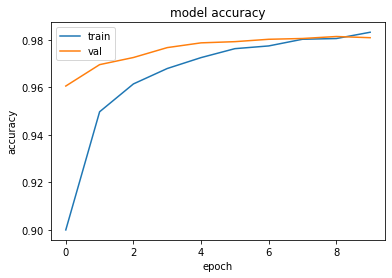

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

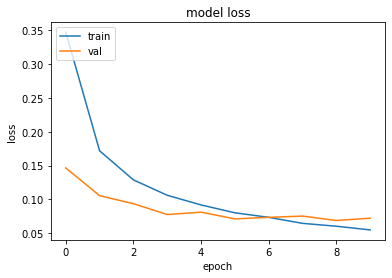

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()